#                          HEART DISEASE PREDICTOR

### This model is based on Supervised Learning and I have used the basic Machine Learning libraries such as Numpy, Pandas,Matplotlib and Seaborn.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta



In [27]:
data=pd.read_csv('heart.csv')

In [28]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## EXPLORATORY DATA ANALYSIS

In [29]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
data.shape

(303, 14)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
# to get percentage of null values present in all columns respectively
round(data.isnull().sum()*100/len(data),2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

As there are no null values in the dataset, we do not need to do much data preprocessing and skip to Data Visualization.

In [33]:
# firstly we will make a copy of our original dataset to perform further actions
data_to_use = data.copy()

## DATA VISUALIZATION USING MATPLOTLIB AND SEABORN

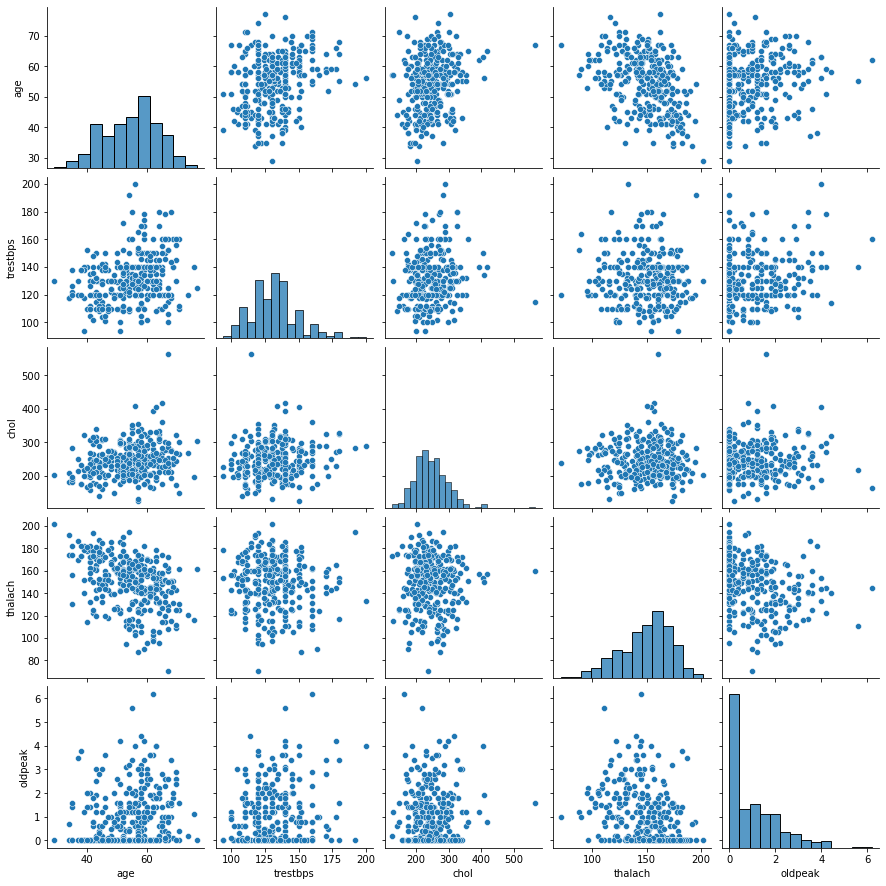

In [34]:
# Visualizing the data to get proper insight
contdata = data_to_use[["age","trestbps","chol","thalach","oldpeak"]].copy()

sns.pairplot(contdata)


               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trestbps  0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


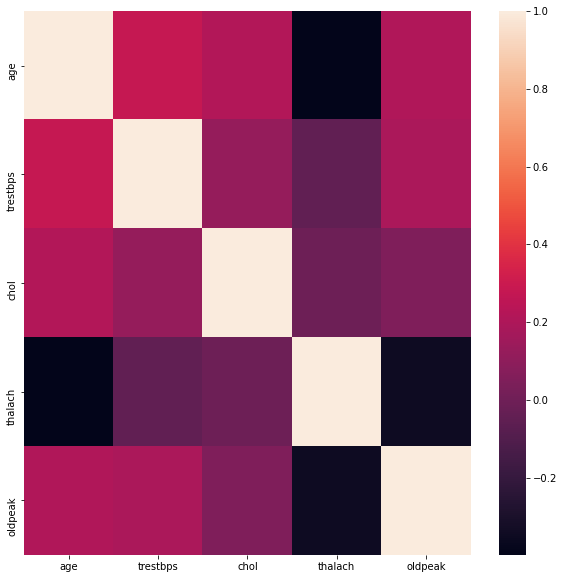

In [35]:
print(contdata.corr())
plt.figure(figsize=(10,10))
sns.heatmap(contdata.corr())
plt.show()

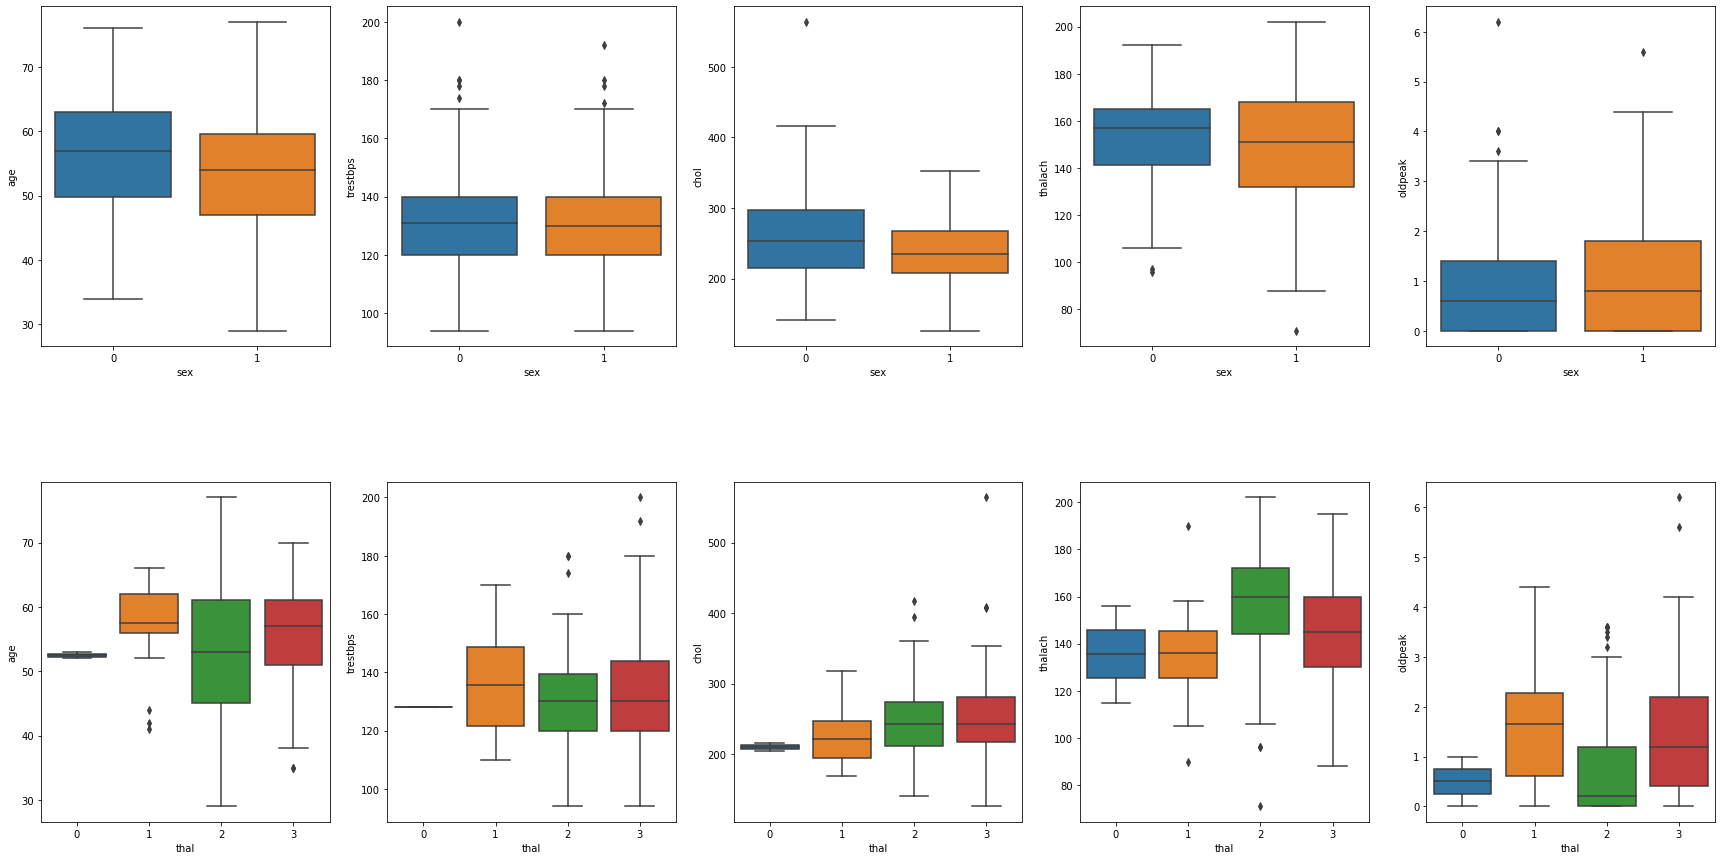

In [36]:
#Making a boxplot for these categorical variables.
categdata_to_use_in_boxplot = data_to_use[['sex','thal']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()


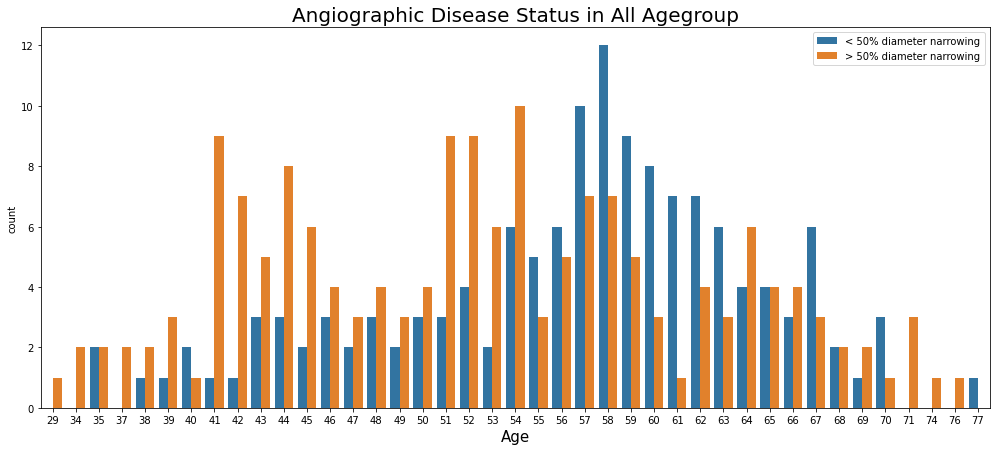

In [37]:
plt.figure(figsize=(17,7))
ax = sns.countplot(x="age", hue="target", data=data_to_use)
plt.title("Angiographic Disease Status in All Agegroup",fontsize = 20)
plt.legend(["< 50% diameter narrowing","> 50% diameter narrowing"],loc='upper right')
plt.xlabel("Age",fontsize = 15)
plt.show()

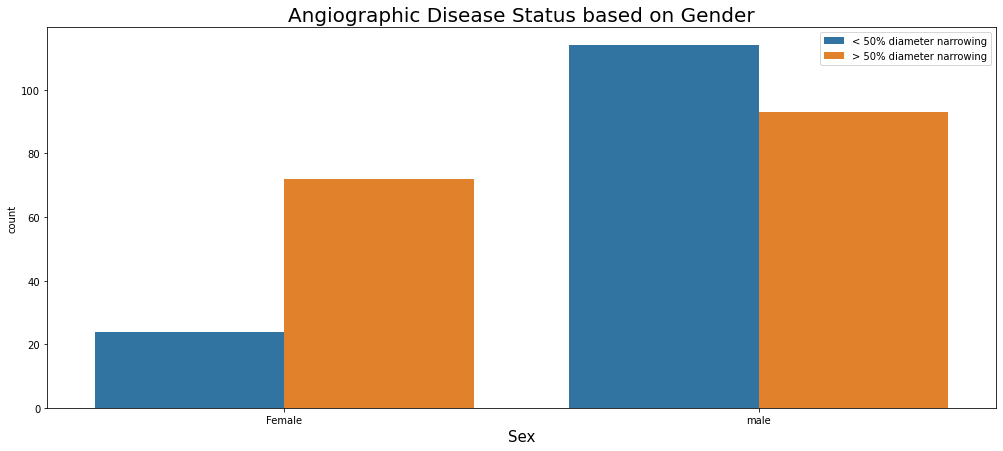

In [38]:
x = ["Female","male"]
values = range(len(x))

plt.figure(figsize=(17,7))
ax = sns.countplot(x="sex", hue="target", data=data_to_use)
plt.title("Angiographic Disease Status based on Gender",fontsize = 20)
plt.legend(["< 50% diameter narrowing","> 50% diameter narrowing"],loc='upper right')
plt.xlabel("Sex",fontsize = 15)
plt.xticks(values,x)
plt.show()

<Figure size 720x504 with 0 Axes>

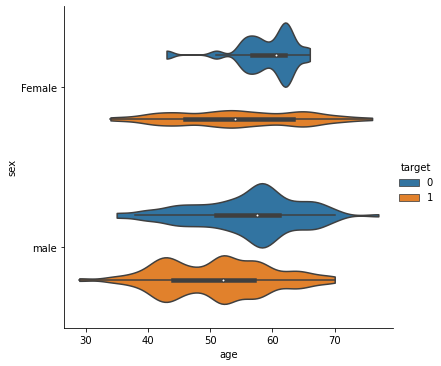

0 : < 50% diameter narrowing
1 : > 50% diameter narrowing


In [39]:
plt.figure(figsize=(10,7))
sns.catplot(x="age", y="sex",
            hue="target",
            data=data_to_use,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

plt.yticks(values,x)
plt.show()
print("0 : < 50% diameter narrowing\n1 : > 50% diameter narrowing")

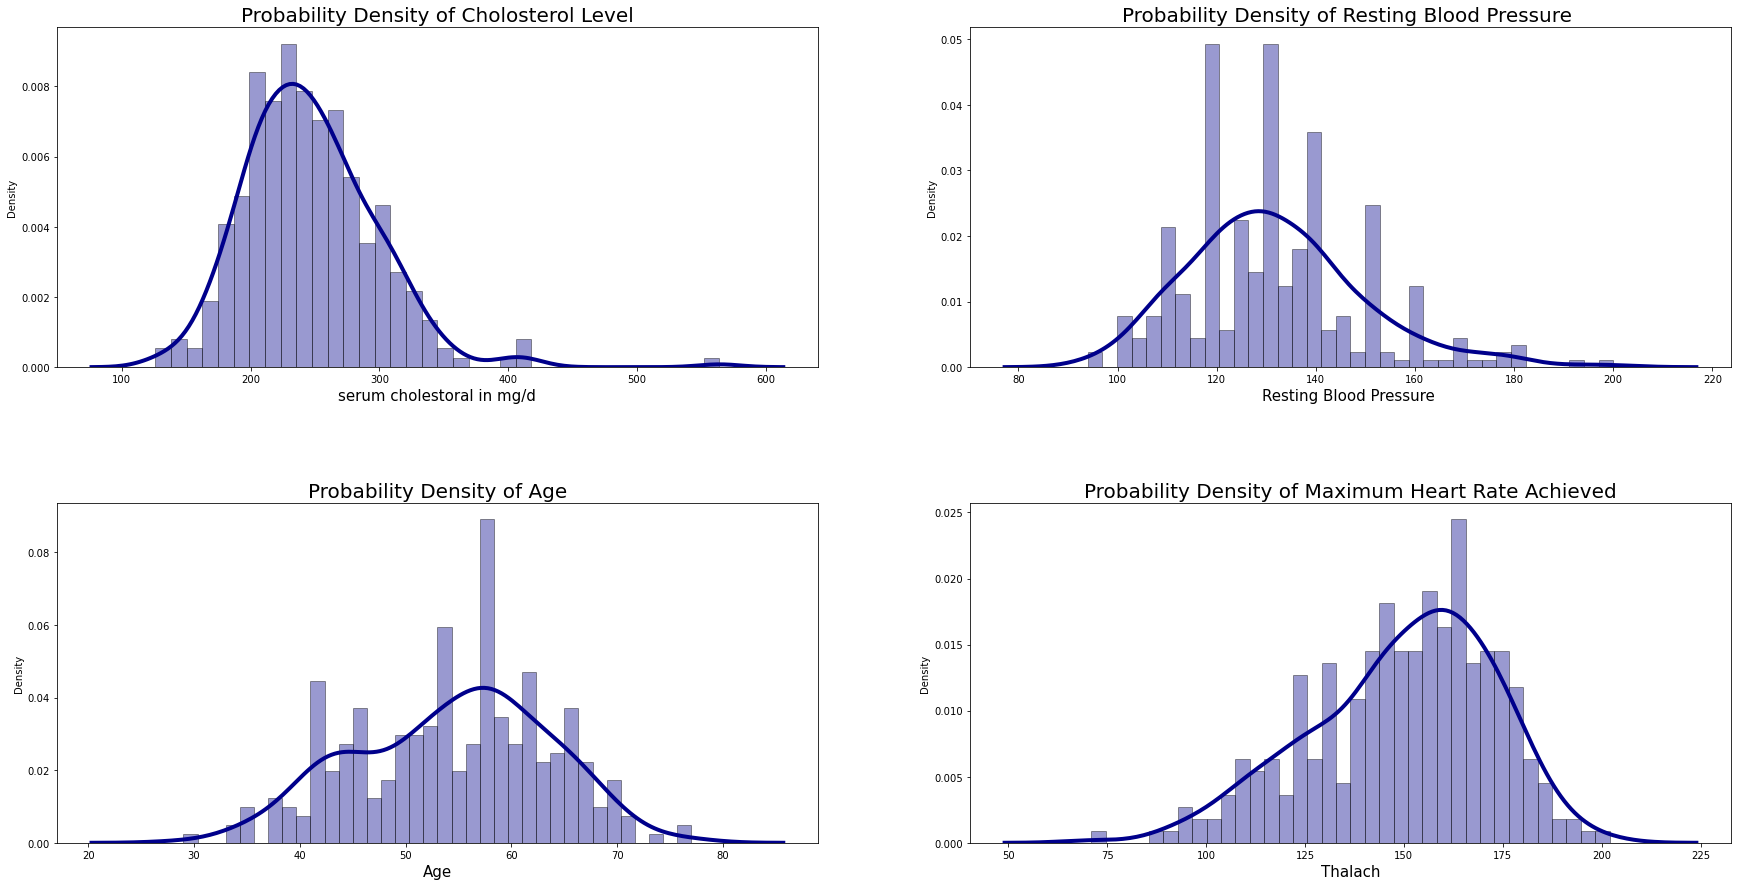

In [40]:
plt.figure(figsize = (30,15))
a = 1
for i in ["chol","trestbps","age","thalach"]:
    
    plt.subplot(2,2,a)
    sns.distplot(data_to_use[i],hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    if i=="chol":
        
        plt.title("Probability Density of Cholosterol Level",fontsize = 20)
        plt.xlabel("serum cholestoral in mg/d",fontsize = 15)
        
    elif i == "age":
        plt.title("Probability Density of Age",fontsize = 20)
        plt.xlabel("Age",fontsize = 15)
    
    elif i == "thalach":
        plt.title("Probability Density of Maximum Heart Rate Achieved",fontsize = 20)
        plt.xlabel("Thalach",fontsize = 15)
        
    else:
        plt.title("Probability Density of Resting Blood Pressure ",fontsize = 20)
        plt.xlabel("Resting Blood Pressure ",fontsize = 15)
    a+=1
    
plt.subplots_adjust(hspace = 0.4)        
plt.show()

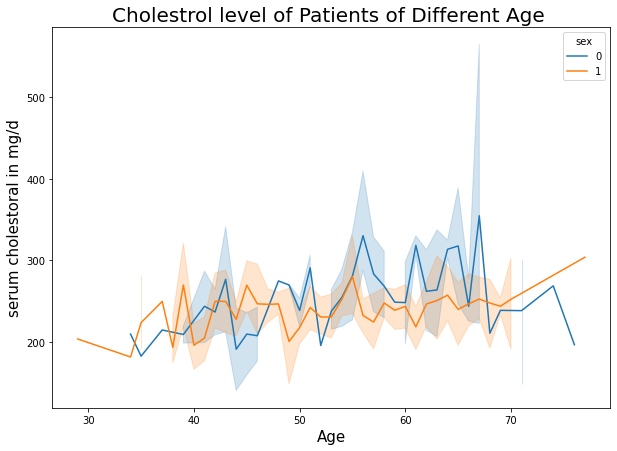

0: Female
1: Male


In [41]:
plt.figure(figsize = (10,7))
sns.lineplot(data=data_to_use, x="age", y="chol",hue = "sex")
plt.title("Cholestrol level of Patients of Different Age ",fontsize = 20)
plt.ylabel("serum cholestoral in mg/d",fontsize = 15)
plt.xlabel("Age",fontsize = 15)

plt.show()
print("0: Female\n1: Male")

In [42]:
X = data_to_use.drop("target",axis =1)
y = data_to_use["target"]

datalist = data.columns.values.tolist()
datalist.remove("target")

## MODEL DEPLOYMENT

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=120)

In [44]:
# Target Mean Encoding for categorical columns in train data

for i in ['age','cp','restecg','slope','ca','thal'] :
    Mean_encoded_variable = data_to_use.groupby([i])['target'].mean().to_dict()

    X_train[i] =  X_train[i].map(Mean_encoded_variable)

# Normalization for continuos column in train data    

scaler = MinMaxScaler()
num_vars = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Fit on object

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [45]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

model.fit(X_train, y_train)
trainscore =  model.score(X_train,y_train)

In [46]:
# Target Mean Encoding on categorical columns in test data
for i in ['age','cp','restecg','slope','ca','thal'] :
    Mean_encoded_variable1 = data_to_use.groupby([i])['target'].mean().to_dict()

    X_test[i] =  X_test[i].map(Mean_encoded_variable1)
    
# Normalization for continuos columns in test data  

X_test[num_vars] = scaler.fit_transform(X_test[num_vars]) 

testscore =  model.score(X_test,y_test)  

## MODEL EVALUATION using Different methods such as Confusion Matrix,etc.

In [47]:
print("test score: {} \ntrain score: {}".format(testscore*100,trainscore*100),'\n')

y_pred =  model.predict(X_test)

test score: 89.47368421052632 
train score: 84.14096916299559 



In [48]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix : 
 [[30  3]
 [ 5 38]]


In [49]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

print(' f1 score: ',f1_score(y_test, y_pred)*100,'\n')
print(' precision score: ',precision_score(y_test, y_pred)*100,'\n')
print(' recall score: ',recall_score(y_test, y_pred)*100,'\n')
print("Classification report: \n",classification_report(y_test, y_pred))

 f1 score:  90.47619047619047 

 precision score:  92.6829268292683 

 recall score:  88.37209302325581 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.93      0.88      0.90        43

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.90        76

